In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from definitions import figures_path_meth, data_source_path, target_countries, fig_size, \
show_plots, save_figs, show_results, target_var, country_col, date_col, incl_countries, incl_years, year_col, month_col, corr_country_names
from helper_functions_general import read_data, get_impl_date, get_trans, get_timescale, get_data_path, select_country_year_measure, \
downsample_month_to_quarter, select_country_year_measure, rename_order_scale
from plot_functions import plot_corr
from statistical_tests import stat_test

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 15})

from sklearn.preprocessing import StandardScaler

In [2]:
# # Monthly CO2 data
# def preprocess_co2_m(source_file: str, source_country_col: str, source_year_col: str, var_name: str):
#     # read data
#     co2_m_raw = read_data(source_path=data_source_path, file_name=source_file)
#     co2_m = co2_m_raw.copy()

#     # lowercase, replace country names
#     co2_m[source_country_col] = co2_m[source_country_col].str.lower()
#     co2_m = co2_m.replace({source_country_col: corr_country_names})

#     # select countries and year
#     co2_m = select_country_year_measure(df=co2_m, country_col=source_country_col, year_col=source_year_col)
#     # pivot
#     co2_m = co2_m.melt(id_vars=[source_country_col, source_year_col],
#                        value_vars=co2_m.drop([source_country_col, source_year_col], axis=1),
#                        value_name=var_name)
#     co2_m[month_col] = co2_m.apply(lambda row: month_name_to_num(row.variable), axis=1)
#     co2_m[date_col] = pd.to_datetime(dict(year=co2_m[source_year_col], month=co2_m[month_col], day=1))
#     co2_m = co2_m.drop('variable', axis=1)

#     # rename, order and scale: output = [index, country, date, value]
#     co2_m = rename_order_scale(df=co2_m, source_country_col=source_country_col, source_year_col=source_year_col,
#                                var_name=var_name, var_scale=1e6, timeframe='m')
#     # downsample monthly to quarterly
#     co2_q = downsample_month_to_quarter(df_m=co2_m, var_name=var_name)

#     # export to csv
#     co2_m.to_csv(f'{get_data_path(timeframe="m")}{var_name}_m.csv')
#     co2_q.to_csv(f'{get_data_path(timeframe="q")}{var_name}_q.csv')

#     return co2_m, co2_q

In [3]:
# def preprocess_brent_m(source_file: str, source_date_col: str, var_name: str):
#     # read data
#     brent_m_raw = read_data(source_path=data_source_path, file_name=source_file)
#     brent_m = brent_m_raw.copy()
    
#     brent_m = brent_m.rename(columns={"DATE": date_col, "BRENT": var_name})
    
#     brent_m[date_col] = pd.to_datetime(brent_m[date_col])
#     brent_m[year_col] = brent_m[date_col].dt.year
#     brent_m[month_col] = brent_m[date_col].dt.month
    
#     #select years
#     brent_m = select_country_year_measure(df=brent_m, year_col=year_col)
    
#     #order
#     brent_m = brent_m[[date_col, year_col, month_col, var_name]].reset_index(drop=True)
    
#     # downsample to q
#     brent_q = downsample_month_to_quarter(df_m=brent_m, var_name=var_name)
    
#     # export to csv
#     brent_m.to_csv(f'{get_data_path(timeframe="m")}{var_name}_m.csv')
#     brent_q.to_csv(f'{get_data_path(timeframe="q")}{var_name}_q.csv')
    
#     return brent_m, brent_q

In [8]:
def preprocess_infl_m(source_file: str, source_country_col: str, var_name: str):
    
    infl_m = read_data(source_path=data_source_path, file_name=source_file)

    # lowercase, replace country names
    infl_m[source_country_col] = infl_m[source_country_col].str.lower()
    infl_m = infl_m.replace({source_country_col: corr_country_names})

    infl_m = infl_m.melt(id_vars=[source_country_col],
                       value_vars=infl_m.drop([source_country_col], axis=1),
                       value_name=var_name)

    infl_m[date_col] = pd.to_datetime(infl_m['variable'])
    infl_m[year_col] = infl_m[date_col].dt.year
    infl_m[month_col] = infl_m[date_col].dt.month
    infl_m = infl_m.drop('variable', axis=1)

    #select years
    infl_m = select_country_year_measure(df=infl_m, year_col=year_col)

    #order
    infl_m = rename_order_scale(df=infl_m, source_country_col=source_country_col,
                                var_name=var_name, var_scale=1e-2, timeframe='m')

    # downsample monthly to quarterly
    infl_q = downsample_month_to_quarter(df_m=infl_m, var_name=var_name, agg='mean')

    # export to csv
#     infl_q.to_csv(f'{get_data_path(timeframe="m")}{var_name}_m.csv')
#     infl_m.to_csv(f'{get_data_path(timeframe="q")}{var_name}_q.csv')

    return infl_m, infl_q

In [9]:
infl_m, infl_q = preprocess_infl_m(source_file='infl_m_2000_2023', source_country_col='Country', var_name='infl')
infl_m

,country,date,year,month,infl
0,austria,2000-01-01,2000,1,0.014
1,austria,2000-02-01,2000,2,0.019
2,austria,2000-03-01,2000,3,0.019
3,austria,2000-04-01,2000,4,0.018
4,austria,2000-05-01,2000,5,0.016
...,...,...,...,...,...
4795,spain,2019-08-01,2019,8,0.004
4796,spain,2019-09-01,2019,9,0.002
4797,spain,2019-10-01,2019,10,0.002
4798,spain,2019-11-01,2019,11,0.005


<AxesSubplot:xlabel='date'>

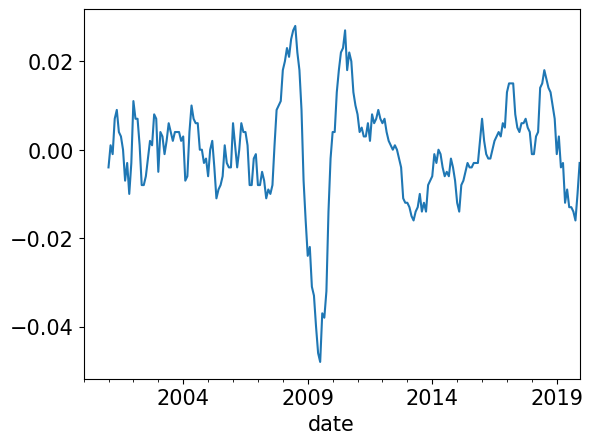

In [17]:
infl_m[infl_m['country']=='france'].set_index('date')['infl'].diff(12).plot()

In [34]:
x = np.log(brent_m.set_index(date_col)['brent']).diff(12).dropna()
x
stat_test(x=x, sign_level=0.05)

'non_stationary'

In [25]:
infl_m[infl_m['infl']==0]

,country,date,year,month,infl
116,austria,2009-09-01,2009,9,0.0
358,belgium,2009-11-01,2009,11,0.0
662,croatia,2015-03-01,2015,3,0.0
664,croatia,2015-05-01,2015,5,0.0
770,cyprus,2004-03-01,2004,3,0.0
893,cyprus,2014-06-01,2014,6,0.0
896,cyprus,2014-09-01,2014,9,0.0
898,cyprus,2014-11-01,2014,11,0.0
1134,estonia,2014-07-01,2014,7,0.0
1138,estonia,2014-11-01,2014,11,0.0
